# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Tue Jan 23 20:15:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0              28W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.0.0


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Self-driving cars - eg. Tesla
2. Interpreting X-Ray photos
3. Security

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is like memorizing for a test but then you can't answer a question that's slightly different.

In other words, if a model is overfitting, it's learning the training data too well and thease patterns don't generalize to unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. **Regularization techniques** - You could use dropout on your neural networks, dropout involves randomly removing neurons in different layers so that the remaining neurons hopefully learn more robust weight/patterns
2. **Use a different model** - maybe the model you're using for a specific problem is too complicated, as is's learning the data too well becouse it has so many layers. You could remove some layers to simplify your model. Or you could pick a totally different model altogether, one that may be more suited to your particular problem. Or.... you could use transfer learning (taking the patterrns from one model and apply them to your own problem).
3. **Reduce noise in data/cleanup dataset/introduce data augumentation techniques** - IF the model is learning the data too well, it might be just memorizing the data, including the noise. One option would be to remove the noise/clean up the dataset or if this doesn't, you can introduce artificial noise through the use of data augumentation to artificially increase the diversity of your dataset.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets

from torchvision import transforms

In [4]:
# Get the MNIST train dataset
train_data = datasets.MNIST(root=".",
                           train=True,
                           download=True,
                           transform=transforms.ToTensor())

# Get the MNIST test dataset
test_data = datasets.MNIST(root=".",
                          download=True,
                          train=False,
                          transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 131277071.96it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 46305693.36it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33558767.08it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 25502715.89it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [5]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# Data is in tuple form (image, label)
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n{img}") 
print(f"Label:\n{label}")

Image:
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
# Check the shapes of data

print(f"Image shape: {img.shape} -> [color channel, height, width]")
print(f"Label: {label} -> no shape, due to being integer")

Image shape: torch.Size([1, 28, 28]) -> [color channel, height, width]
Label: 5 -> no shape, due to being integer


## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [9]:
# Get the class names from the dataset

class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

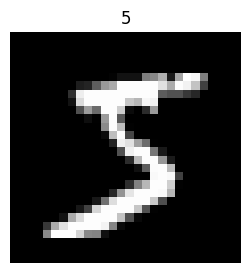

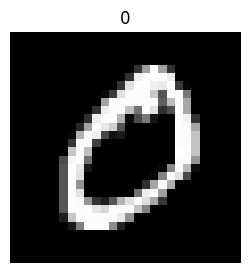

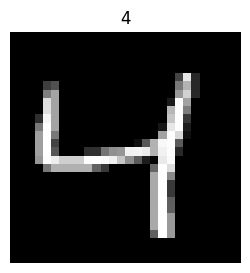

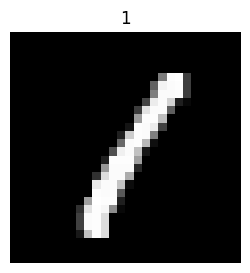

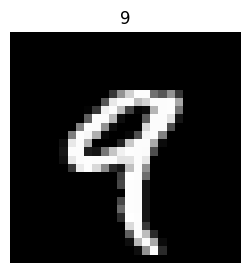

In [10]:
import matplotlib.pyplot as plt

for i in range(5):
    img = train_data[i][0]
    label = train_data[i][1]
    plt.figure(figsize=(3,3))
    plt.imshow(img.permute(1,2,0), cmap="gray")
    plt.title(label)
    plt.axis(False)
    

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [11]:
# Create train dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                         batch_size=32,
                         shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=32,
                            shuffle=False)


In [12]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7992ba679180>,
 <torch.utils.data.dataloader.DataLoader at 0x7992ba49bd90>)

In [13]:
for sample in next(iter(train_dataloader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [14]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [15]:
import torch
from torch import nn

class MNISTModel(torch.nn.Module):
    """
    Model capable of predicting on MNIST dataset.
    """
    
    def __init__(self,input_shape: int,hidden_units: int,output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                     out_features=output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
#         print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
#         print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
#         print(f"Output shape of classifier: {x.shape}")

        return x
        
        
    

In [16]:
model = MNISTModel(input_shape=1,
                    hidden_units=10,
                    output_shape=10,
                   ).to(device)

model

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [17]:
# Check out the model state dict to find out what patterns our model wants to learn

# model.state_dict()

In [18]:
# Try dummy forward pass to see what shapes our data is

dummy_x = torch.rand(size=(1,28,28)).unsqueeze(dim=0).to(device)
dummy_x.shape
model(dummy_x)

tensor([[-0.0805,  0.0113, -0.0114, -0.0232, -0.0003,  0.0845,  0.0102,  0.0115,
         -0.0469,  0.0123]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [19]:
%%time
# Train on CPU

from tqdm.auto import tqdm

device = "cpu"

model_cpu = MNISTModel(input_shape=1,
                       hidden_units=10,
                       output_shape=10).to(device)

# Create a loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_cpu.train()
        
        # Put data on CPU
        X, y = X.to(device), y.to(device)
        
        # Forward pass
        y_pred = model_cpu(X)
        
        # Loss calculation
        loss = loss_fn(y_pred,y)
        train_loss += loss
        
        # Optimizer zero grad
        optimizer.zero_grad()
        
        # Loss backward
        loss.backward()
        
        # Step the optimizer
        optimizer.step()
        
    # Adjust train loss for number of batches
    train_loss /= len(train_dataloader)
    
    
    # Testing loop
    test_loss_total = 0
    
    # Put model in evalmode
    model_cpu.eval()
    
    # Turn on inference mode
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Make sure test data is on CPU
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_pred = model_cpu(X_test)
            test_loss = loss_fn(test_pred, y_test)

            test_loss_total += test_loss
        test_loss_total /= len(test_dataloader)
            
    print(f"Epoch: {epoch}\t|\tLoss: {train_loss:.6f}\t|\tTest loss: {test_loss_total:.6f}\t|\tDevice: {device}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0	|	Loss: 0.417158	|	Test loss: 0.081817	|	Device: cpu
Epoch: 1	|	Loss: 0.077788	|	Test loss: 0.053641	|	Device: cpu
Epoch: 2	|	Loss: 0.061229	|	Test loss: 0.040858	|	Device: cpu
Epoch: 3	|	Loss: 0.052319	|	Test loss: 0.047666	|	Device: cpu
Epoch: 4	|	Loss: 0.045867	|	Test loss: 0.041923	|	Device: cpu
CPU times: user 3min 49s, sys: 1.55 s, total: 3min 51s
Wall time: 1min 55s


In [20]:
%%time
# Train on GPU

from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available else "cpu"

model_gpu = MNISTModel(input_shape=1,
                       hidden_units=10,
                       output_shape=10).to(device)



# Create a loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    model_gpu.train()
    for batch, (X, y) in enumerate(train_dataloader):
        
        # Put data on GPU
        X, y = X.to(device), y.to(device)
        
        # Forward pass
        y_pred = model_gpu(X)
        
        # Loss calculation
        loss = loss_fn(y_pred,y)
        train_loss += loss
        
        # Optimizer zero grad
        optimizer.zero_grad()
        
        # Loss backward
        loss.backward()
        
        # Step the optimizer
        optimizer.step()
        
    # Adjust train loss for number of batches
    train_loss /= len(train_dataloader)
    
    
    # Testing loop
    test_loss_total = 0
    
    # Put model in evalmode
    model_gpu.eval()
    
    # Turn on inference mode
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Make sure test data is on GPU
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_pred = model_gpu(X_test)
            test_loss = loss_fn(test_pred, y_test)

            test_loss_total += test_loss
        test_loss_total /= len(test_dataloader)
            
    print(f"Epoch: {epoch}\t|\tLoss: {train_loss:.6f}\t|\tTest loss: {test_loss_total:.6f}\t|\tDevice: {device}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0	|	Loss: 0.276907	|	Test loss: 0.083814	|	Device: cuda
Epoch: 1	|	Loss: 0.073163	|	Test loss: 0.109389	|	Device: cuda
Epoch: 2	|	Loss: 0.057825	|	Test loss: 0.059499	|	Device: cuda
Epoch: 3	|	Loss: 0.049500	|	Test loss: 0.045168	|	Device: cuda
Epoch: 4	|	Loss: 0.043541	|	Test loss: 0.048391	|	Device: cuda
CPU times: user 53.2 s, sys: 381 ms, total: 53.6 s
Wall time: 54.1 s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

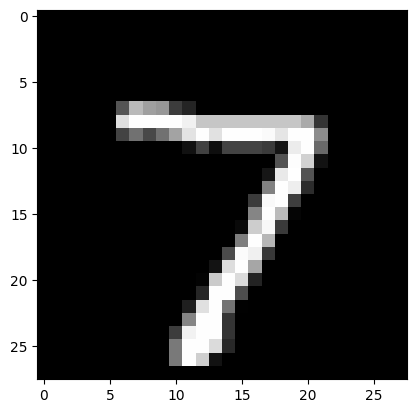

In [30]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [29]:
# Logits -> Prediction probabilities -> Prediction labels

model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

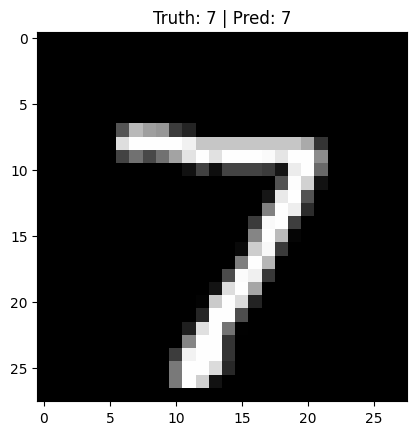

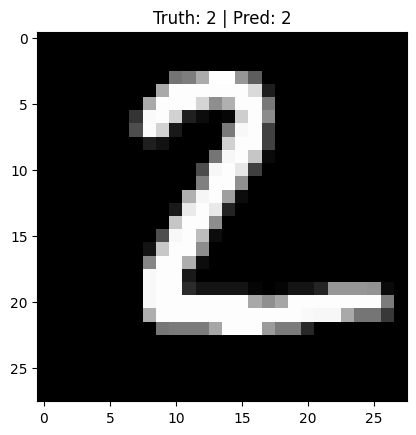

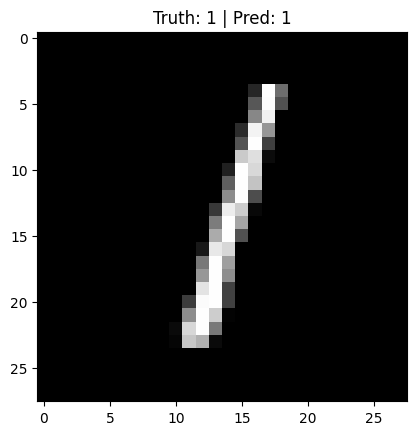

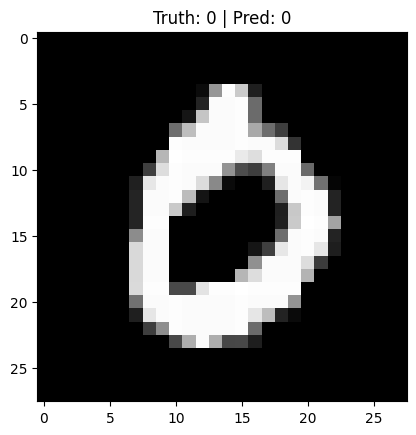

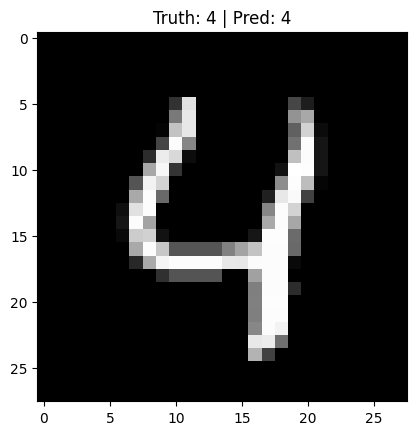

In [33]:
num_to_plot = 5
for i in range(num_to_plot):
    img = test_data[i][0]
    label = test_data[i][1]
    
    # Make prediction on image
    model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)
    
    # Plot the image and prediction
    plt.figure()
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
    plt.axis();
              

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [35]:
# See if required packages are installed and if not, install them...
try:

    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [36]:
import mlxtend
print(mlxtend.__version__)

0.23.1


In [42]:
# Make predictions across all test data
from tqdm.auto import tqdm

model_gpu.eval()
y_preds = []
with torch.inference_mode():
    for batch, (X, y) in tqdm(enumerate(test_dataloader)):
        # Make sure data on right device
        X, y = X.to(device), y.to(device)
        
        # Forward pass
        y_pred_logit = model_gpu(X)
        
        # Logits -> Pred probs -> Pred label
        y_pred_labels = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
        
        # Append the labels to the pred list
        y_preds.append(y_pred_labels)
    y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [43]:
y_preds[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [44]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

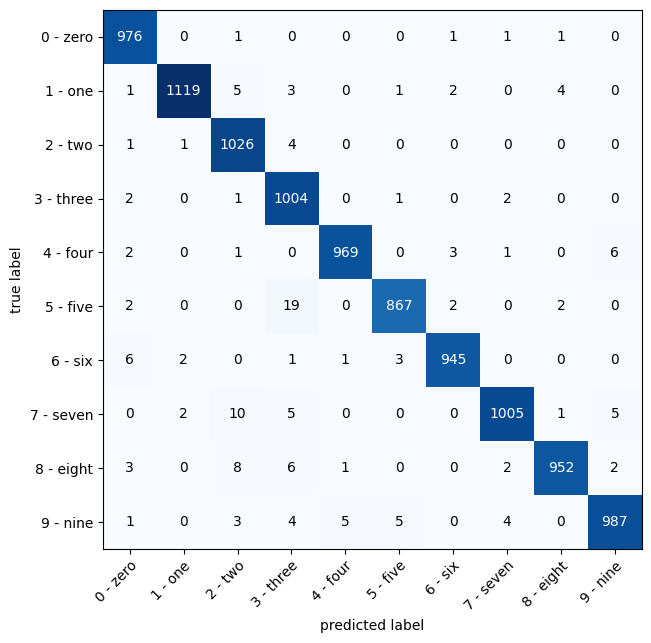

In [52]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task='multiclass', num_classes = len(class_names))
confmat_tensor = confmat(preds=y_preds,
                        target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names=class_names, figsize=(10,7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [54]:
random_tensor = torch.rand([1,3,64,64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [56]:
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 10, 64, 64])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?